In [66]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)

## 序贯（Sequential）模型
序贯模型是多个网络层的线性堆叠
它可以通过想Sequential模型传递一个Layer的list来构造该模型

In [67]:
from keras.datasets import mnist
from keras.models import Sequential  
from keras.layers.core import Dense,Dropout,Activation #网络结构
from keras.optimizers import SGD,Adam,RMSprop  #最优化
from keras.utils import np_utils



In [68]:
from keras.utils.vis_utils import plot_model

In [69]:
batch_size=100
nb_classes=10
nb_epoch=20

In [70]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("G:\\ANACONDA\\envs\\Tensorflow\\MNIST_data", one_hot=True)
 
X_train, y_train = mnist.train.images,mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels
X_var,y_var= mnist.validation.images, mnist.validation.labels
X_train = X_train.reshape(55000, 784)
X_var=X_var.reshape(5000,784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  ### 归一化到0~1
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_var.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\train-images-idx3-ubyte.gz
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\train-labels-idx1-ubyte.gz
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting G:\ANACONDA\envs\Tensorflow\MNIST_data\t10k-labels-idx1-ubyte.gz
55000 train samples
5000 validation samples
10000 test samples


In [71]:
## 转换类标号 如果定义的标签是np的形式可以用这个
#Y_train=np_utils.to_categorical(y_train,nb_classes)
#Y_test=np_utils.to_categorical(y_test,nb_classes)
print(y_train.shape)

(55000, 10)


In [72]:
###    建立模型
#keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
model=Sequential()
model.add(Dense(512,input_shape=(784,))) #全连接
# now the model will take as input arrays of shape (*, 784)
# and output arrays of shape (*, 512)

# after the first layer, you don't need to specify 
# the size of the input anymore:
model.add(Activation('relu'))
model.add(Dropout(0.2)) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))##softmax→概率

In [73]:
model.summary()   ## 打印模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
__________

In [74]:
plot_model(model, to_file='model.png')

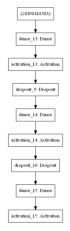

In [75]:
### 显示
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

model_str = mpimg.imread(r'C:\Users\123\Desktop\Keras_study\model.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
plt.imshow(model_str) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [76]:
### 编译模型 损失、最优
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy']
             )

In [77]:
### 训练模型
history=model.fit(X_train,y_train,
                  batch_size=batch_size,
                  nb_epoch=nb_epoch,
                  verbose=1,
                  validation_data=(X_var,y_var))

G:\ANACONDA\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 10s 174us/step - loss: 0.8272 - acc: 0.7449 - val_loss: 3.8954 - val_acc: 0.7496
Epoch 2/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.3581 - acc: 0.8929 - val_loss: 2.2730 - val_acc: 0.8552
Epoch 3/20
55000/55000 [==============================] - 9s 167us/step - loss: 0.2735 - acc: 0.9176 - val_loss: 1.4997 - val_acc: 0.9044
Epoch 4/20
55000/55000 [==============================] - 9s 165us/step - loss: 0.2191 - acc: 0.9340 - val_loss: 1.1926 - val_acc: 0.9244
Epoch 5/20
55000/55000 [==============================] - 9s 164us/step - loss: 0.1792 - acc: 0.9459 - val_loss: 0.8749 - val_acc: 0.9448
Epoch 6/20
55000/55000 [==============================] - 9s 165us/step - loss: 0.1521 - acc: 0.9544 - val_loss: 0.7187 - val_acc: 0.9546
Epoch 7/20
55000/55000 [==============================] - 9s 163us/step - loss: 0.1346 - acc: 0.9596 - val_loss: 0.6386 - 

In [79]:
### 模型评估
score=model.evaluate(X_test,y_test,verbose=0)
print('Test score',score[0]) # 损失
print('Test accuracy',score[1])# 正确

Test score 0.0826880748363823
Test accuracy 0.9782


In [80]:
model.save('mnist-mpl.h5')